## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
df = pd.read_csv("Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
## Checking Nulls

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
## Checking Duplicates

df.duplicated().sum()

0

## Univariate Analysis

### Checking Data Distribution of Channel 

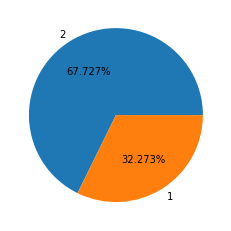

In [6]:
plt.pie(df.Channel.value_counts(),
       labels = df.Channel.unique(),
       autopct = '%0.3f%%');

### Checking Data Distribution of Region

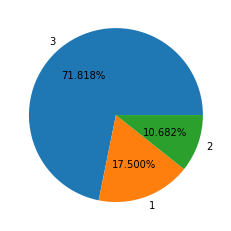

In [7]:
plt.pie(df.Region.value_counts(),
       labels = df.Region.unique(),
       autopct = '%0.3f%%');

Severe Class Imbalance

### Checking total unique values in different columns

In [8]:
for col in df.iloc[:, 2:].columns:
    print("Total Unique values in ", col)
    a = df[col].nunique()
    print(a, '\n', "*"*40)

Total Unique values in  Fresh
433 
 ****************************************
Total Unique values in  Milk
421 
 ****************************************
Total Unique values in  Grocery
430 
 ****************************************
Total Unique values in  Frozen
426 
 ****************************************
Total Unique values in  Detergents_Paper
417 
 ****************************************
Total Unique values in  Delicassen
403 
 ****************************************


### Checking Data Distribution

Feature:  Fresh


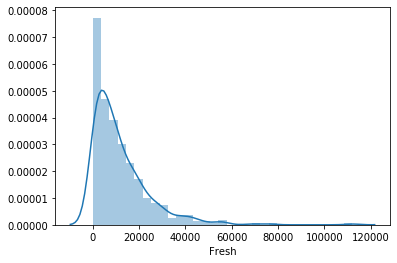

*****************************************************************************************************************************
Feature:  Milk


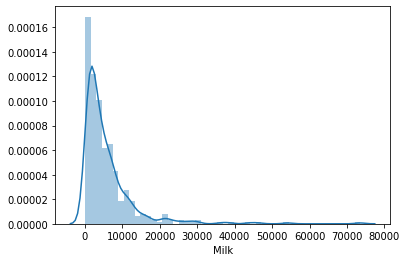

*****************************************************************************************************************************
Feature:  Grocery


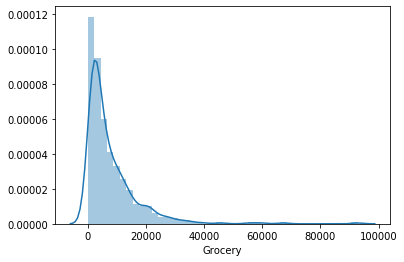

*****************************************************************************************************************************
Feature:  Frozen


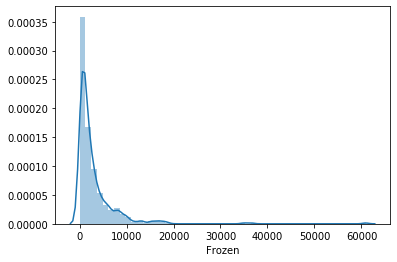

*****************************************************************************************************************************
Feature:  Detergents_Paper


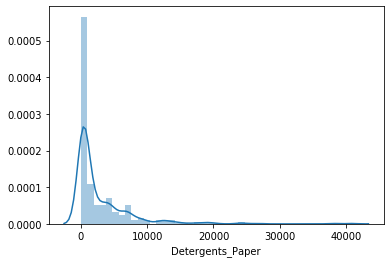

*****************************************************************************************************************************
Feature:  Delicassen


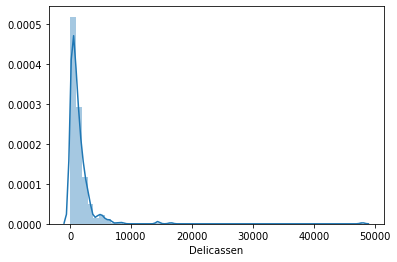

*****************************************************************************************************************************


In [9]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.distplot(df[col])
    plt.show()
    print("*"*125)

### Boxplots

Feature:  Fresh


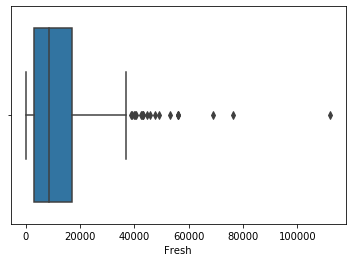

*****************************************************************************************************************************
Feature:  Milk


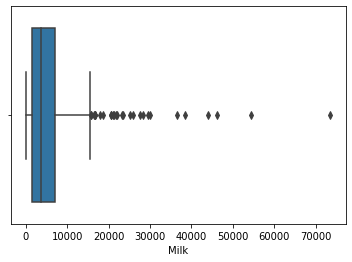

*****************************************************************************************************************************
Feature:  Grocery


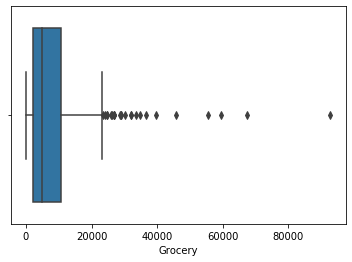

*****************************************************************************************************************************
Feature:  Frozen


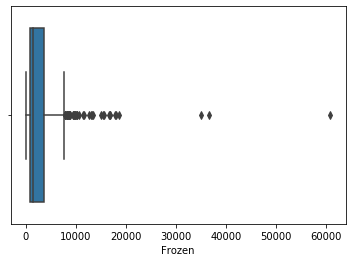

*****************************************************************************************************************************
Feature:  Detergents_Paper


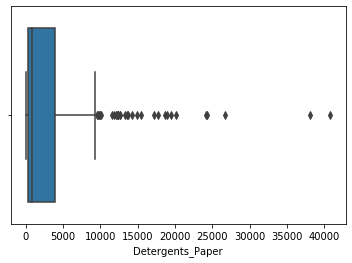

*****************************************************************************************************************************
Feature:  Delicassen


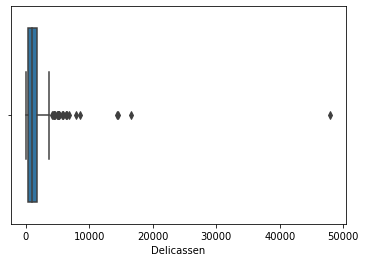

*****************************************************************************************************************************


In [10]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.boxplot(df[col])
    plt.show()
    print("*"*125)

Leaving the outliers as such

## Bivariate Analysis

In [11]:
df.groupby(['Channel', 'Region'])['Milk'].sum().to_frame()

Milk
Channel Region         
1       1        228342
        2         64519
        3        735753
2       1        194112
        2        174625
        3       1153006

In [12]:
df.groupby(['Channel', 'Region'])['Fresh'].sum().to_frame()

Fresh
Channel Region         
1       1        761233
        2        326215
        3       2928269
2       1         93600
        2        138506
        3       1032308

In [13]:
df.groupby(['Channel', 'Region'])['Grocery'].sum().to_frame()

Grocery
Channel Region         
1       1        237542
        2        123074
        3        820101
2       1        332495
        2        310200
        3       1675150

In [14]:
df.groupby(['Channel', 'Region'])['Frozen'].sum().to_frame()

Frozen
Channel Region        
1       1       184512
        2       160861
        3       771606
2       1        46514
        2        29271
        3       158886

In all the above cases, Region 3 shows max and this can be due to high class imbalance

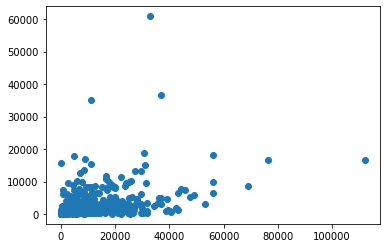

In [15]:
plt.scatter(df.Fresh, df.Frozen)
plt.show()

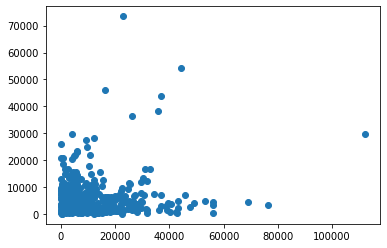

In [16]:
plt.scatter(df.Fresh, df.Milk)
plt.show()

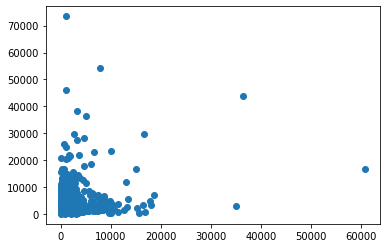

In [17]:
plt.scatter(df.Frozen, df.Milk)
plt.show()

### Checking Correlation

In [18]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Preprocessing

### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

### PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scaled_data)

principalComponents

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 ],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276],
       ...,
       [ 3.86514909, -0.47985376, -0.52534452, -0.68713197],
       [-1.09706738, -0.06989568, -0.63012755,  0.31182088],
       [-1.16595067, -0.90215675, -0.59770486,  0.34265555]])

In [22]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904])

In [23]:
0.38750123 + 0.22374588 + 0.12647173 + 0.09229904

0.83001788

A total of 83% of the total variance of the original data is explained by feature extraction using PCA (0.38750123 + 0.22374588 + 0.12647173 + 0.09229904 = 0.83001788)

In [24]:
## Eigen Values

pca.singular_values_

array([36.9324292 , 28.06395368, 21.09930107, 18.02477769])

In [25]:
pca.components_

array([[ 4.28291564e-01,  2.47260253e-02, -2.53194580e-02,
         4.74409947e-01,  5.36329145e-01, -2.99745579e-02,
         5.23906297e-01,  1.64996527e-01],
       [-2.04698855e-01,  4.31296430e-02,  5.13444679e-01,
         2.05540611e-01, -8.71761988e-03,  5.92745252e-01,
        -1.21083091e-01,  5.33180819e-01],
       [-8.29798863e-02, -9.82500889e-01, -8.89509074e-02,
         2.57510842e-02,  4.53143572e-02,  1.22156522e-01,
         4.74814388e-02, -9.30199386e-04],
       [ 2.96441646e-02,  7.78446249e-02, -7.98475924e-01,
         5.40220237e-02, -1.21586244e-01,  1.61316883e-01,
        -1.51012112e-01,  5.37557669e-01]])

### Creating new dataframe after PCA transformation

In [26]:
principal_df = pd.DataFrame(data = principalComponents
                           , columns = ['pc1','pc2', 'pc3', 'pc4'])
                           
principal_df

,pc1,pc2,pc3,pc4
0,0.843939,-0.515351,-0.767632,-0.044215
1,1.062676,-0.484601,-0.672975,0.401372
2,1.269141,0.682055,-0.664095,1.634953
3,-1.056782,0.610821,-0.505654,0.196005
4,0.634030,0.974199,-0.771209,0.186374
...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036
436,-1.290172,1.560397,-0.756171,-1.342401
437,3.865149,-0.479854,-0.525345,-0.687132
438,-1.097067,-0.069896,-0.630128,0.311821


## Model Building

### Agglomerative Hierarichal Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering

### Checking for optimal number of clusters using Silhoutte Curve- Linkage criteria- Complete

In [28]:
import sklearn.metrics

SS_c = []

for i in range(2,20):
    
    hac = AgglomerativeClustering(linkage="complete", n_clusters=i)
    pred = hac.fit_predict(principal_df)
    
    SS_c.append(sklearn.metrics.silhouette_score(principal_df, pred))

Text(0, 0.5, 'Silhoutte')

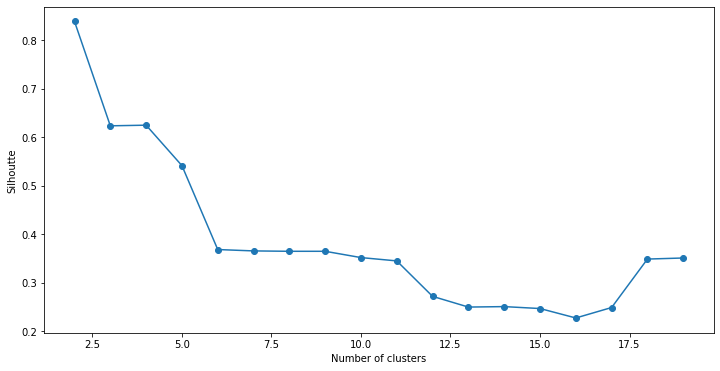

In [29]:
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(2,20), 'SS':SS_c})

plt.figure(figsize=(12,6))

plt.plot(frame['Cluster'], frame['SS'], marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Silhoutte')

### Changing linkage criteria to average to see change in the curve

In [30]:
import sklearn.metrics

SS_av = []

for i in range(2,20):
    
    hac = AgglomerativeClustering(linkage="average", n_clusters=i)
    pred = hac.fit_predict(principal_df)
    
    SS_av.append(sklearn.metrics.silhouette_score(principal_df, pred))

Text(0, 0.5, 'Silhoutte')

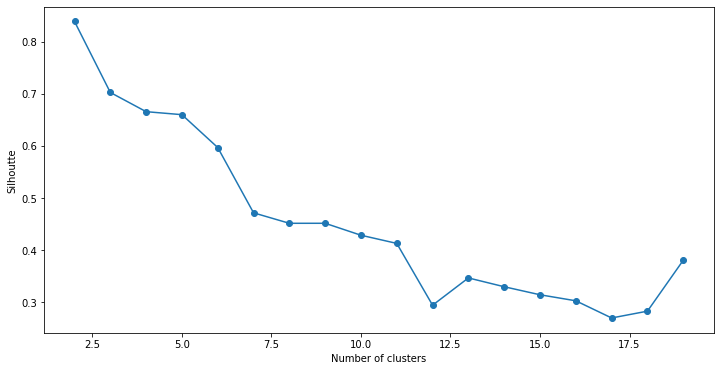

In [31]:
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(2,20), 'SS':SS_av})

plt.figure(figsize=(12,6))

plt.plot(frame['Cluster'], frame['SS'], marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Silhoutte')

### Changing linkage criteria to single

In [32]:
import sklearn.metrics

SS_s = []

for i in range(2,20):
    
    hac = AgglomerativeClustering(linkage="single", n_clusters=i)
    pred = hac.fit_predict(principal_df)
    
    SS_s.append(sklearn.metrics.silhouette_score(principal_df, pred))

Text(0, 0.5, 'Silhoutte')

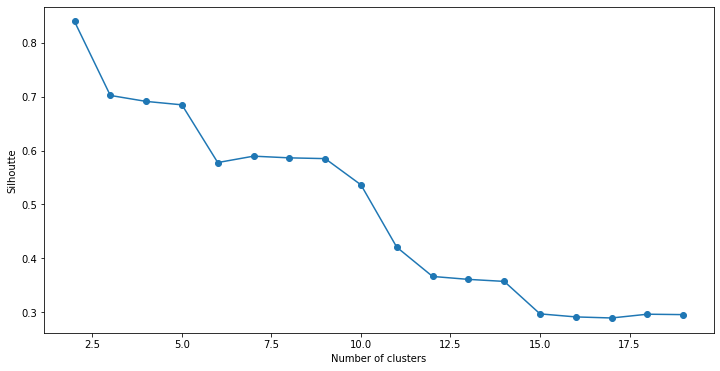

In [33]:
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(2,20), 'SS':SS_s})

plt.figure(figsize=(12,6))

plt.plot(frame['Cluster'], frame['SS'], marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Silhoutte')

Each is showing optimal clusters somewhere around 4 and 5

### Linkage Criteria Single is giving better values for more number of clusters also compared to the other 2

### Creating a model with 4 clusters

In [34]:
hac = AgglomerativeClustering(linkage="single", n_clusters=4)

y_pred4 = hac.fit_predict(principal_df)

In [35]:
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
principal_df["4 cluster results"] = y_pred4

In [37]:
principal_df.head()

,pc1,pc2,pc3,pc4,4 cluster results
0,0.843939,-0.515351,-0.767632,-0.044215,0
1,1.062676,-0.484601,-0.672975,0.401372,0
2,1.269141,0.682055,-0.664095,1.634953,0
3,-1.056782,0.610821,-0.505654,0.196005,0
4,0.634030,0.974199,-0.771209,0.186374,0


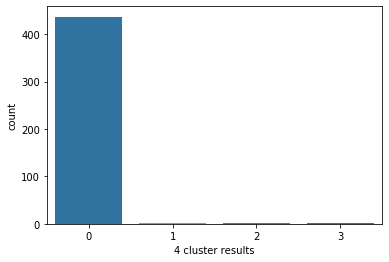

In [38]:
sns.countplot(principal_df["4 cluster results"])

In [39]:
sklearn.metrics.davies_bouldin_score(principal_df, y_pred4)

0.18159486311136605

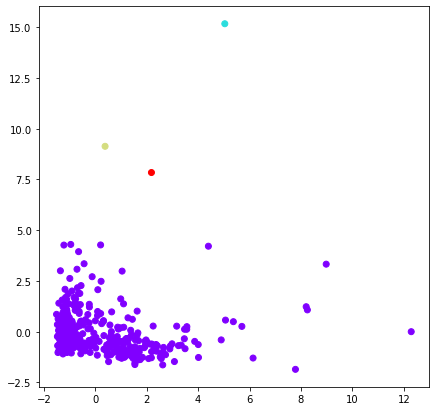

In [40]:
plt.figure(figsize=(7,7))

plt.scatter(principal_df.pc1, principal_df.pc2, c = principal_df["4 cluster results"], cmap="rainbow")

plt.show()

### Decreasing Clusters to 3

In [41]:
hac3 = AgglomerativeClustering(linkage="single", n_clusters = 3)

y_pred3 = hac3.fit_predict(principal_df)

In [42]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
principal_df["3 cluster results"] = y_pred3

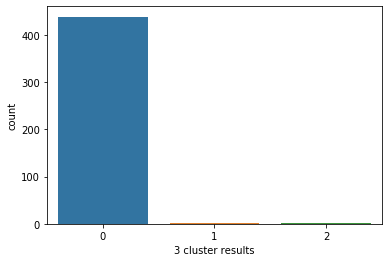

In [44]:
sns.countplot(principal_df["3 cluster results"])

In [45]:
sklearn.metrics.davies_bouldin_score(principal_df, y_pred3)

0.17326274926488952

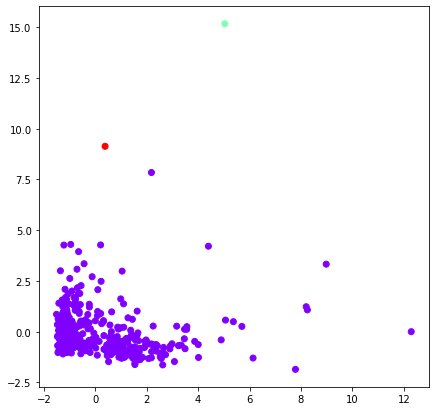

In [46]:
plt.figure(figsize=(7,7))

plt.scatter(principal_df.pc1, principal_df.pc2, c = principal_df["3 cluster results"], cmap="rainbow")

plt.show()

### Changing Linkage Criteria

In [47]:
hac4_c = AgglomerativeClustering(linkage="complete", n_clusters=4)

y_pred4_c = hac.fit_predict(principal_df)

In [48]:
y_pred4_c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
principal_df["3 cluster results comp"] = y_pred4_c

In [50]:
sklearn.metrics.davies_bouldin_score(principal_df, y_pred4_c)

0.17523753775654471

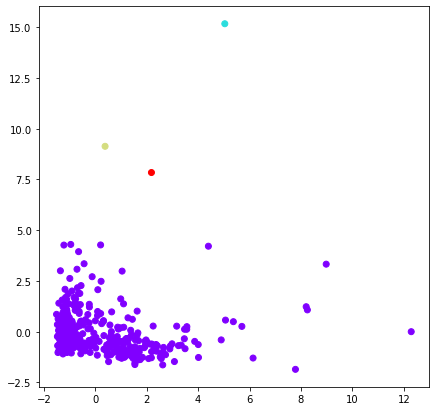

In [51]:
plt.figure(figsize=(7,7))

plt.scatter(principal_df.pc1, principal_df.pc2, c = principal_df["3 cluster results comp"], cmap="rainbow")

plt.show()

### Using Normal Scaled Data

In [52]:
hac4_sd = AgglomerativeClustering(linkage="complete", n_clusters=4)

y_pred4_sd = hac.fit_predict(scaled_data)

In [81]:
y_pred4_sd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)

scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [54]:
scaled_data["4 cluster results"] = y_pred4_sd

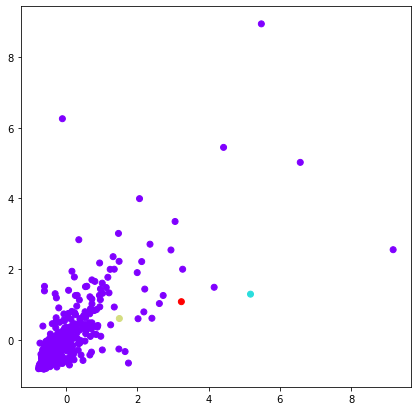

In [55]:
plt.figure(figsize=(7,7))

plt.scatter(scaled_data.Milk, scaled_data.Grocery, c = scaled_data["4 cluster results"], cmap="rainbow")

plt.show()

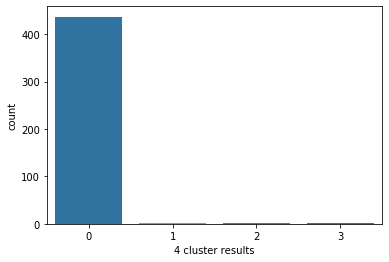

In [56]:
sns.countplot(scaled_data["4 cluster results"])

## Dendogram

In [57]:
## Defining Function

from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [63]:
hac4_c = AgglomerativeClustering(linkage="complete", n_clusters=4)

y_pred4_c = hac.fit(principal_df)

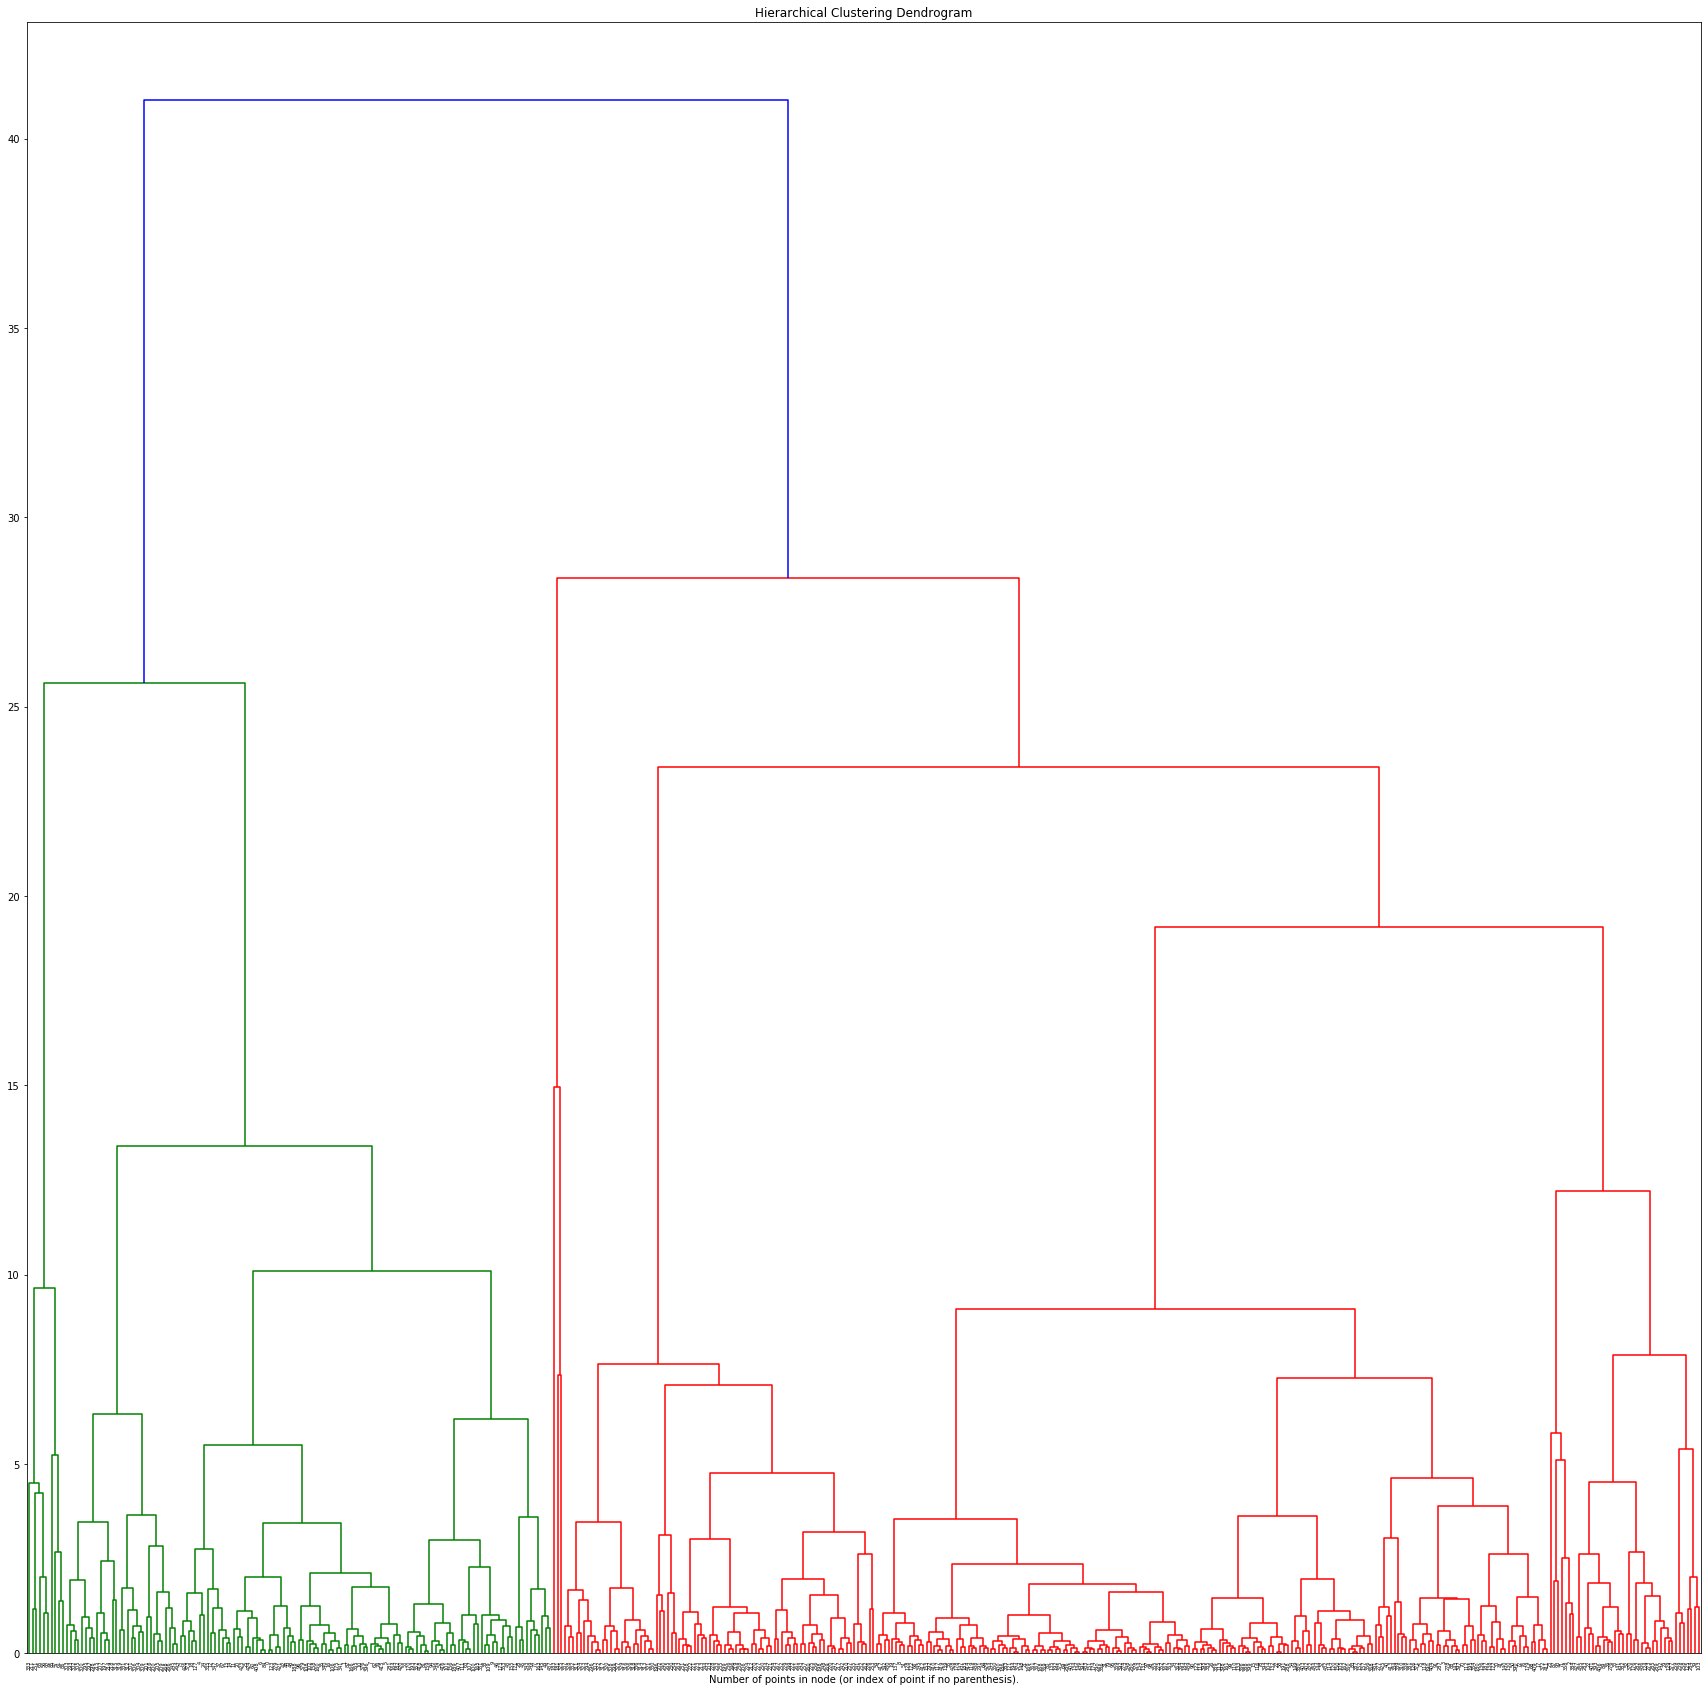

In [64]:
plt.figure(figsize = (30,30))

plt.title('Hierarchical Clustering Dendrogram')

# plot the top three levels of the dendrogram
plot_dendrogram(y_pred4_c)#, truncate_mode='level', p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

In [59]:
## Setting distance_threshold

hac = AgglomerativeClustering(distance_threshold=2, n_clusters=None)

model = hac.fit(principal_df)

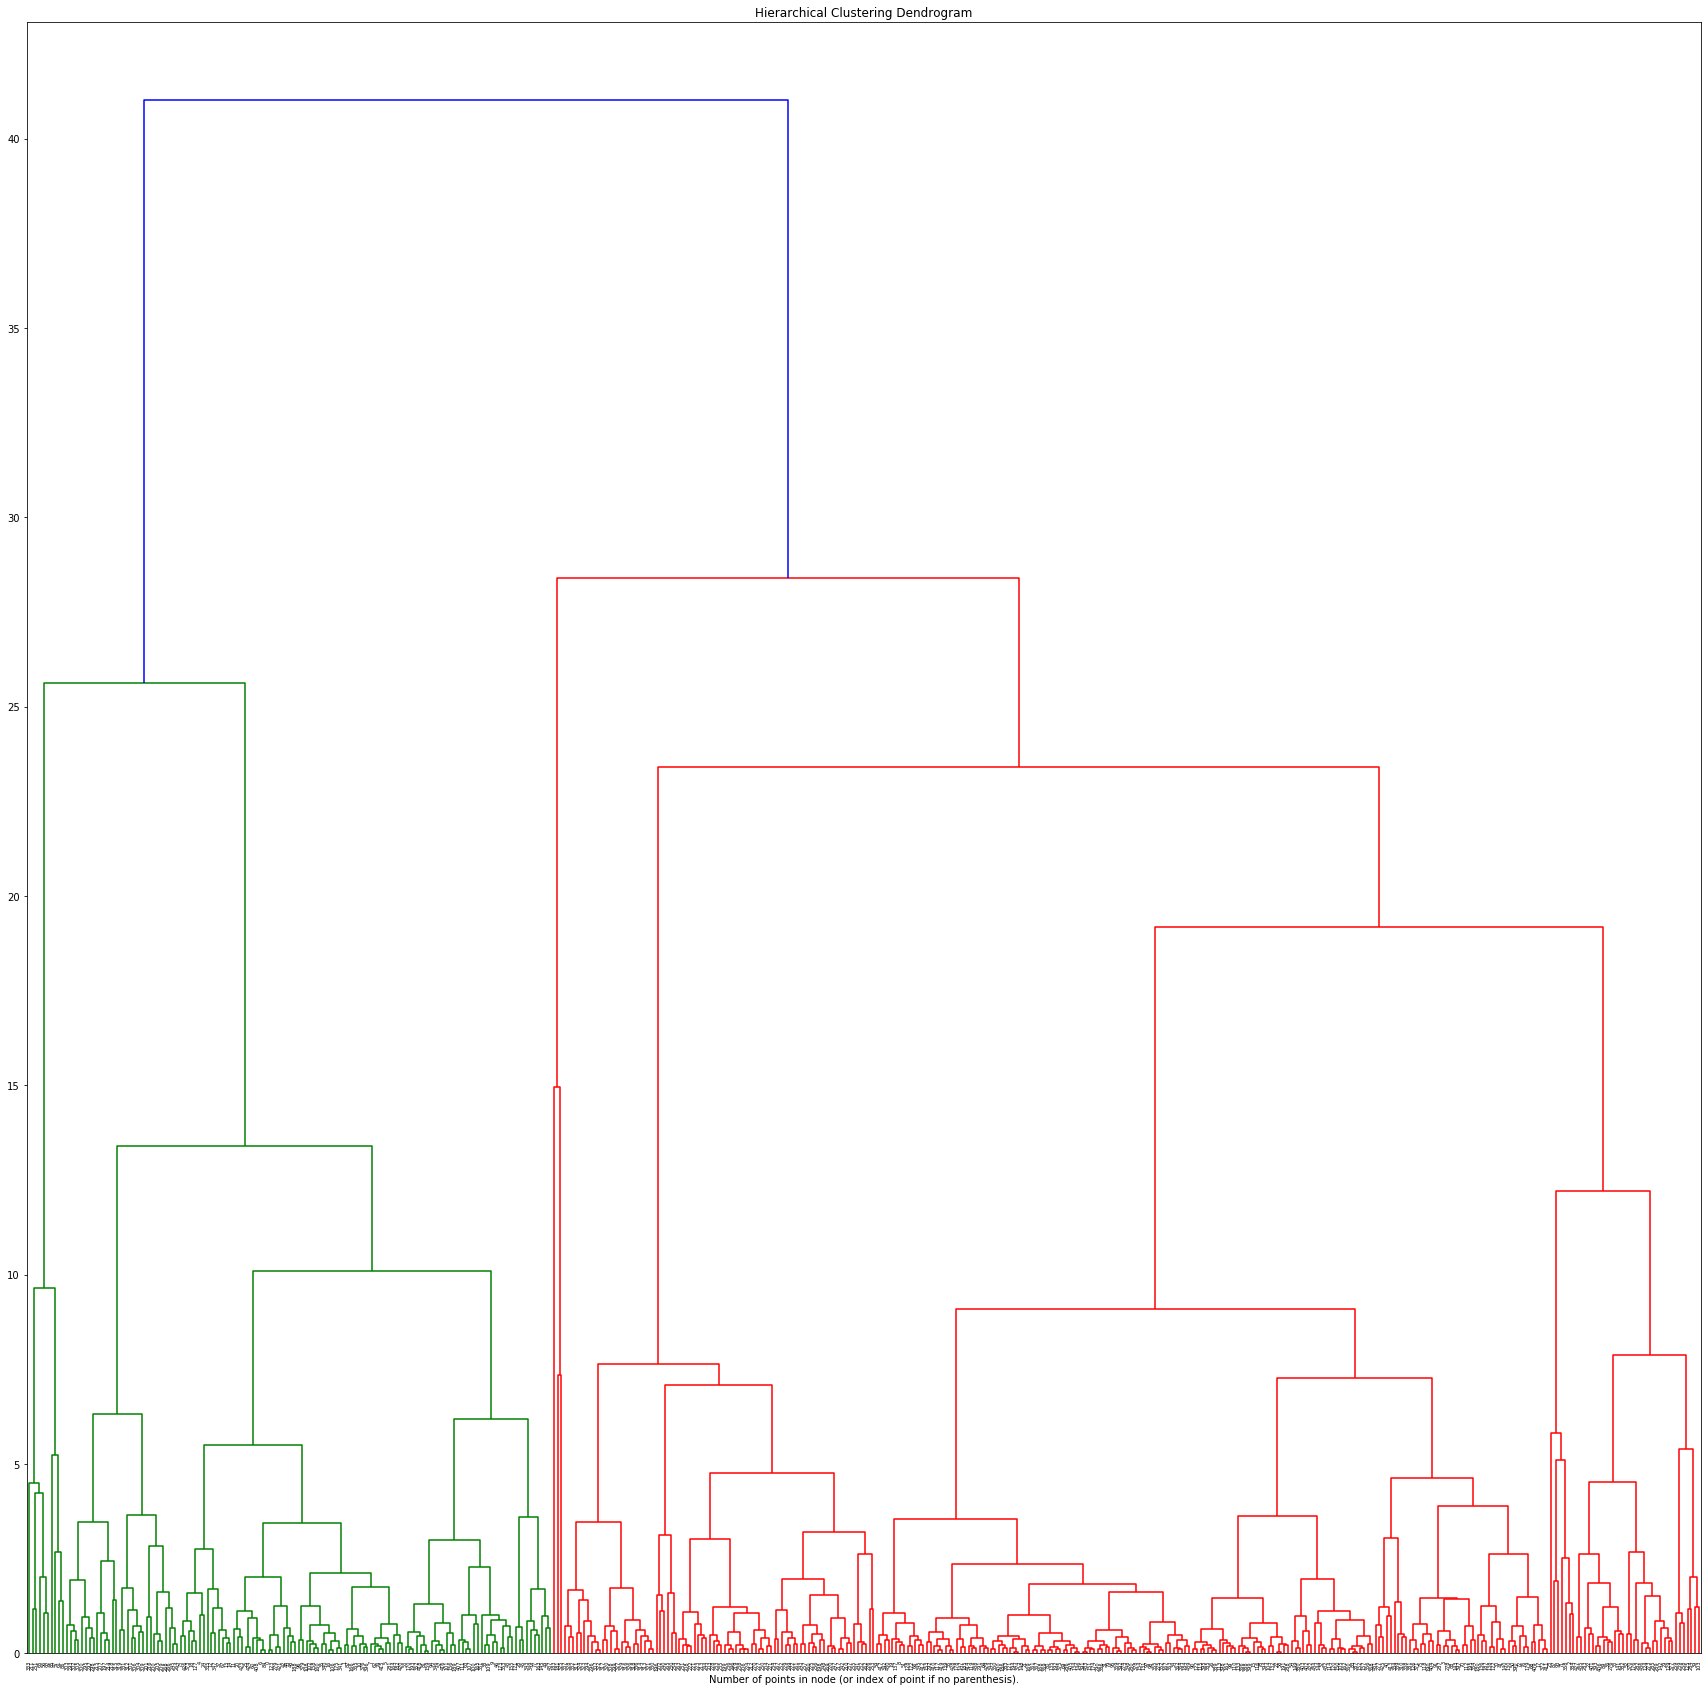

In [60]:
plt.figure(figsize = (30,30))

plt.title('Hierarchical Clustering Dendrogram')

# plot the top three levels of the dendrogram
plot_dendrogram(model)#, truncate_mode='level', p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()